In [ ]:
import rainbow as rb
import os

path = "C:/Users/Sandeep/Desktop/Error-LC/Method-Data"
batches = os.listdir(path)
batches = [os.path.join(path, file) for file in batches]

error_lc_files = []
for batch in batches:
    batch_files = os.listdir(batch)
    batch_files = [os.path.join(batch, file) for file in batch_files if ".D" in file]
    error_lc_files.extend(batch_files)

# analyses = PressureCurvesAnalyses(files=error_lc_files)
# print("Number of analyses: ", len(analyses.data))

In [ ]:
file = error_lc_files[0]
print(file)
### replace Error-LC/Method-Data\\250613_Mix-1_10x100ng-mL 2025-06-13 17-02-43\\002-D2F-B1-Flush and 003-D2F-B2-Blank from server and run csv creation on them

('C:/Users/Sandeep/Desktop/Error-LC/Method-Data\\250613_Mix-1_10x100ng-mL 2025-06-13 17-02-43\\001-D2F-B1-Flush', '.D')


In [ ]:

datadir = rb.read(file)
datafiles = datadir.datafiles # compatible types
print(datafiles)


[DAD1A.ch, MSD1.MS, MSD2.MS]


In [ ]:

for f in datafiles: # xlabels= retention time, ylabels = mz/wavelength, data = intensity
    print(f.get_info())



--------
DAD1A.ch
--------
Detector: UV
Xlabels: [1.00000000e-04 3.08333333e-04 5.16666667e-04 ... 6.99968333e+00
 6.99989167e+00 7.00010000e+00]
Ylabels: ['192.0']
Data: [[-3.04480642]
 [-3.94980609]
 [-5.36873192]
 ...
 [-6.79998845]
 [-6.2905848 ]
 [-6.24732673]]
Metadata: {'notebook': 'Flush', 'date': '13-Jun-25, 17:07:26', 'method': '250611_1D_05MLMIN_5-90B_5MIN_SIM-TIC_NOFRAG.M', 'instrument': 'Asterix ChemStation', 'unit': 'mAU', 'signal': 'DAD1A, Sig=192.0,4.0  Ref=360.0,100.0'}


-------
MSD1.MS
-------
Detector: MS
Xlabels: [0.0516     0.0665     0.08141667 0.09633333 0.11125    0.12616667
 0.14108333 0.156      0.17091667 0.18583333 0.20073333 0.21565
 0.23056667 0.24548333 0.2604     0.27531667 0.29023333 0.30515
 0.32005    0.33496667 0.34988333 0.3648     0.37971667 0.39463333
 0.40955    0.42446667 0.43936667 0.45428333 0.4692     0.48411667
 0.49903333 0.51395    0.52886667 0.54378333 0.55868333 0.5736
 0.58851667 0.60343333 0.61835    0.63326667 0.64818333 0.6631
 0.6

In [ ]:
print(f.extract_traces()) # returns data (intensity) for the given ylabels. Rows correspond to ylabels

[[ 892 1298 1123 ...  745  886 1005]
 [1367 2211 3748 ... 1184 1358 1197]
 [4365 3521 4938 ... 9098 9443 8944]
 ...
 [   4    3    7 ...    6    6    4]
 [   3    0    4 ...    3    3    2]
 [   1    3    2 ...    3    2    2]]


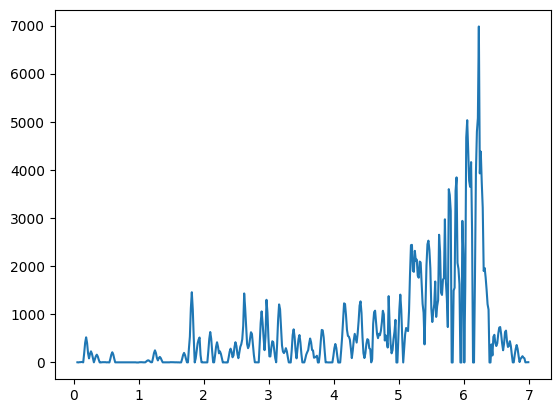

In [ ]:
f.plot(label=600) # label represents the ylabel (mz) for which data should be plotted

In [ ]:
### DONE ###
# for file in error_lc_files:
#     try:

#         datadir = rb.read(file)
#         #datadir.get_info()
#         datafiles = datadir.datafiles
#         #ms_data = {}
#         print(file, ": ", datafiles)

#         for f in datafiles:
#             if f.detector == "MS":
#                 print(f"writing {f.name} csv..")
#                 f.export_csv(os.path.join(file, f"{os.path.splitext(f.name)[0]}.csv"))
#         print("\n")
#             # print("Summary: ", file.get_info())
#             # ms_data[f"{file.name}"] = {"rt" : file.xlabels, # 1-D retention time (minutes)
#             #                             "mz" : file.ylabels, # 1-D mz/wavelength
#             #                             "intensity" : file.data} # 2-D intensity # all np.ndarrays
#     except Exception:
#         print("Problem with file ", file, ", skipping this iteration")
#         pass

C:/Users/Sandeep/Desktop/Error-LC/Method-Data\250613_Mix-1_10x100ng-mL 2025-06-13 17-02-43\001-D2F-B1-Flush.D :  [DAD1A.ch, MSD1.MS, MSD2.MS]
writing MSD1.MS csv..
writing MSD2.MS csv..


C:/Users/Sandeep/Desktop/Error-LC/Method-Data\250613_Mix-1_10x100ng-mL 2025-06-13 17-02-43\002-D2F-B1-Flush.D :  [DAD1A.ch]


C:/Users/Sandeep/Desktop/Error-LC/Method-Data\250613_Mix-1_10x100ng-mL 2025-06-13 17-02-43\003-D2F-B2-Blank.D :  [DAD1A.ch]


C:/Users/Sandeep/Desktop/Error-LC/Method-Data\250613_Mix-1_10x100ng-mL 2025-06-13 17-02-43\004-D2F-A1-Mix 1.D :  [DAD1A.ch, MSD1.MS, MSD2.MS]
writing MSD1.MS csv..
writing MSD2.MS csv..


C:/Users/Sandeep/Desktop/Error-LC/Method-Data\250613_Mix-1_10x100ng-mL 2025-06-13 17-02-43\005-D2F-A1-Mix 1.D :  [DAD1A.ch, MSD1.MS, MSD2.MS]
writing MSD1.MS csv..
writing MSD2.MS csv..


C:/Users/Sandeep/Desktop/Error-LC/Method-Data\250613_Mix-1_10x100ng-mL 2025-06-13 17-02-43\006-D2F-A1-Mix 1.D :  [DAD1A.ch, MSD1.MS, MSD2.MS]
writing MSD1.MS csv..
writing MSD2.MS csv.